In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
def filtrar_listas(listas):
    listas_con_un_mayor_a_cero = []
    posiciones = []
    
    for i, lista in enumerate(listas):
        # Verificar si la lista tiene exactamente un número mayor que cero
        if len([num for num in lista if num > 0]) == 1:
            listas_con_un_mayor_a_cero.append(lista)
            posiciones.append(i)
    
    return listas_con_un_mayor_a_cero, posiciones

In [3]:
def contar_por_posicion(y):
    conteo_por_posicion = [0] * 7
    # Recorrer cada lista
    for lista in y:
        # Encontrar la posición del valor mayor a 0
        for i, elemento in enumerate(lista):
            # Si encontramos un valor mayor a 0, incrementamos el contador correspondiente
            if elemento > 0:
                conteo_por_posicion[i] += 1
                break  # Una vez encontrado el valor mayor a 0, podemos salir del bucle
    return conteo_por_posicion


In [4]:
df0 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv")
df0.head(3)

,ID,Compounds,Microorganism,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other,SMILES,validate smiles,SMARTS,SELFIES
0,1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",0,1,0,1,0,0,0,OC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6](-[#8])...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
1,2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,0,1,0,1,0,0,0,c1ccc(O)c(O)c1C(=O)NCC(O)=O,True,[#6]1:[#6]:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:1...,[C][=C][C][=C][Branch1][C][O][C][Branch1][C][O...
2,3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",0,1,0,1,0,0,0,OC[C@@H](C(O)=O)NC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6]-[#6@@H](-[#6](-[#8])=[#8])-[#7]-[#6]...,[O][C][C@@H1][Branch1][=Branch1][C][Branch1][C...


In [5]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    221 non-null    object
 1   Compounds             221 non-null    object
 2   Microorganism         149 non-null    object
 3   hydroxamate           221 non-null    int64 
 4   catecholate           221 non-null    int64 
 5   a-hydroxycarboxylate  221 non-null    int64 
 6   carboxylate           221 non-null    int64 
 7   phenolate             221 non-null    int64 
 8   citrate               221 non-null    int64 
 9   other                 221 non-null    int64 
 10  SMILES                221 non-null    object
 11  validate smiles       221 non-null    bool  
 12  SMARTS                221 non-null    object
 13  SELFIES               221 non-null    object
dtypes: bool(1), int64(7), object(6)
memory usage: 22.8+ KB


In [6]:
columns_t = ['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other']

df0['target'] = df0[columns_t].values.tolist()
targets= df0['target'].tolist()

In [7]:
targets_1, pos_1 = filtrar_listas(targets)

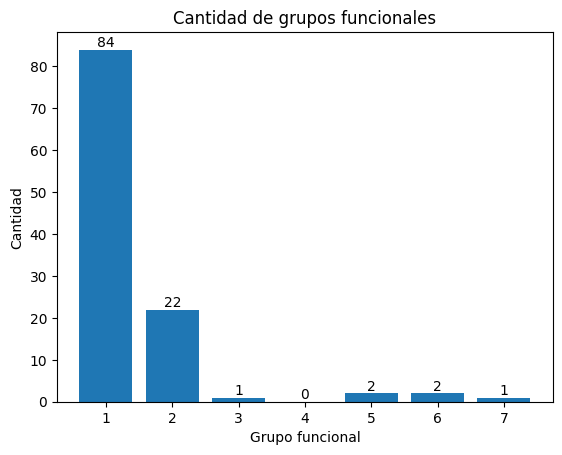

In [9]:
conteo_por_posicion=contar_por_posicion(targets_1)

# Lista de posiciones
posiciones = list(range(1, 8))

# Crear el gráfico de barras
plt.bar(posiciones, conteo_por_posicion)

# Agregar etiquetas y título
plt.xlabel('Grupo funcional')
plt.ylabel('Cantidad')
plt.title('Cantidad de grupos funcionales')

for i, conteo in enumerate(conteo_por_posicion):
    plt.text(posiciones[i], conteo, str(conteo), ha='center', va='bottom')
    
# Mostrar el gráfico
plt.show()

In [10]:
df1 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv")
df1.head()

,ID,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,...,0,0,0,0,0,1,0,1,2,1
1,2,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,...,0,1,0,0,1,1,0,1,2,2
2,3,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,...,0,1,0,0,1,1,0,1,2,2
3,4,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,...,0,1,0,0,1,1,0,1,2,2
4,5,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,...,0,0,0,0,0,1,0,1,1,0


In [13]:
df1.info()
print('Nombre columnas:',df1.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 119 entries, ID to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32), object(1)
memory usage: 205.6+ KB
Nombre columnas: Index(['ID', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons',
       ...
       'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_amide', 'fr_benzene',
       'fr_ester', 'fr_para_hydroxylation', 'fr_phenol',
       'fr_phenol_noOrthoHbond'],
      dtype='object', length=119)


In [14]:
df1.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.00000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,14.361458,-5.557024,14.361458,1.244646,0.151045,652.732149,608.708548,652.316484,254.986425,0.304900,...,1.932127,3.443439,0.438914,2.98190,4.665158,0.782805,0.325792,0.588235,1.312217,1.303167
std,1.306650,1.186967,1.306650,0.508051,0.203659,246.818504,229.903744,246.675305,97.555508,0.034790,...,1.344994,2.705670,0.815825,2.83479,2.864534,1.090402,0.727833,0.985184,2.010718,2.012109
min,9.667832,-7.433673,9.667832,0.011382,0.007004,138.122000,130.082000,138.031694,52.000000,0.211046,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.693037,-6.290073,13.693037,1.036932,0.030619,474.551000,436.247000,474.257731,184.000000,0.272302,...,1.000000,2.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.222851,-5.571034,14.222851,1.280840,0.058700,684.788000,632.372000,684.369406,270.000000,0.322843,...,2.000000,3.000000,0.000000,2.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.424962,-5.211695,15.424962,1.618549,0.158075,800.952000,748.469000,800.464369,314.000000,0.331716,...,3.000000,5.000000,1.000000,6.00000,6.000000,1.000000,0.000000,1.000000,2.000000,2.000000
max,16.647474,-0.881916,16.647474,2.220550,0.881757,1198.215000,1126.647000,1197.505065,470.000000,0.371663,...,5.000000,12.000000,3.000000,8.00000,13.000000,4.000000,3.000000,3.000000,6.000000,6.000000


In [15]:
df0_subset=df0[['hydroxamate', 'catecholate']]
df=pd.concat([df1,df0_subset],axis=1)
df.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,hydroxamate,catecholate
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.00000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,14.361458,-5.557024,14.361458,1.244646,0.151045,652.732149,608.708548,652.316484,254.986425,0.304900,...,0.438914,2.98190,4.665158,0.782805,0.325792,0.588235,1.312217,1.303167,1.524887,0.592760
std,1.306650,1.186967,1.306650,0.508051,0.203659,246.818504,229.903744,246.675305,97.555508,0.034790,...,0.815825,2.83479,2.864534,1.090402,0.727833,0.985184,2.010718,2.012109,1.409567,0.989372
min,9.667832,-7.433673,9.667832,0.011382,0.007004,138.122000,130.082000,138.031694,52.000000,0.211046,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.693037,-6.290073,13.693037,1.036932,0.030619,474.551000,436.247000,474.257731,184.000000,0.272302,...,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.222851,-5.571034,14.222851,1.280840,0.058700,684.788000,632.372000,684.369406,270.000000,0.322843,...,0.000000,2.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,15.424962,-5.211695,15.424962,1.618549,0.158075,800.952000,748.469000,800.464369,314.000000,0.331716,...,1.000000,6.00000,6.000000,1.000000,0.000000,1.000000,2.000000,2.000000,3.000000,1.000000
max,16.647474,-0.881916,16.647474,2.220550,0.881757,1198.215000,1126.647000,1197.505065,470.000000,0.371663,...,3.000000,8.00000,13.000000,4.000000,3.000000,3.000000,6.000000,6.000000,4.000000,3.000000


In [16]:
df_numeric_c = df.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación
corr_c = df_numeric_c.set_index('hydroxamate').corr()
high_corr_values_c = corr_c.where(np.abs(corr_c) > 0.7).stack()

# Filtrar los valores distintos de NaN
high_corr_values_c = high_corr_values_c.dropna()

print("Valores de correlación mayores que 0.7:")
print(high_corr_values_c)

Valores de correlación mayores que 0.7:
MaxEStateIndex  MaxEStateIndex            1.000000
                MinEStateIndex           -0.892189
                MaxAbsEStateIndex         1.000000
                MolWt                     0.841158
                HeavyAtomMolWt            0.842445
                                            ...   
catecholate     fr_benzene                0.886718
                fr_para_hydroxylation     0.853123
                fr_phenol                 0.971309
                fr_phenol_noOrthoHbond    0.971061
                catecholate               1.000000
Length: 3271, dtype: float64


In [17]:
df_numeric_h = df.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación
corr_h = df_numeric_h.set_index('catecholate').corr()
high_corr_values_h = corr_h.where(np.abs(corr_h) > 0.7).stack()

# Filtrar los valores distintos de NaN
high_corr_values_h = high_corr_values_h.dropna()

print("Valores de correlación mayores que 0.7:")
print(high_corr_values_h)

Valores de correlación mayores que 0.7:
MaxEStateIndex  MaxEStateIndex       1.000000
                MinEStateIndex      -0.892189
                MaxAbsEStateIndex    1.000000
                MolWt                0.841158
                HeavyAtomMolWt       0.842445
                                       ...   
hydroxamate     PEOE_VSA8            0.822073
                FractionCSP3         0.719666
                fr_NH0               0.793292
                fr_N_O               0.974994
                hydroxamate          1.000000
Length: 3263, dtype: float64


In [18]:
columns_f = ['fr_benzene', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'PEOE_VSA8', 'fr_N_O']
columns_t = ['hydroxamate', 'catecholate']

df['target'] = df[columns_t].values.tolist()
Y= df0['target'].tolist()

df['features_x'] = df[columns_f].values.tolist()
X= df['features_x'].tolist()

In [19]:
y, pos_1 = filtrar_listas(Y)

In [20]:
n=0
y_0=[]
y_1=[]
pos_1_0=[]
pos_1_1=[]

while n<len(y):
    if y[n][0]>0:
        y_0.append(y[n])
        pos_1_0.append(pos_1[n])
        n=n+1
    elif y[n][1]>0:
        y_1.append(y[n])
        pos_1_1.append(pos_1[n])
        n=n+1
    else:
        n=n+1

In [21]:
y_total=y_0+y_1*4
pos_total=pos_1_0+pos_1_1*4

In [22]:
x = []

for pos in pos_total:
    x.append(X[pos])

In [23]:
y_final=[]

for element in y_total:
    y_final.append(''.join(map(str, element[:2])))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y_final, test_size=0.2)

In [26]:
model=SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          01       0.00      0.00      0.00         2
          02       0.00      0.00      0.00         7
          03       0.43      1.00      0.60         9
          20       0.00      0.00      0.00         2
          30       0.93      0.93      0.93        14
          40       0.00      0.00      0.00         1

    accuracy                           0.63        35
   macro avg       0.23      0.32      0.25        35
weighted avg       0.48      0.63      0.53        35



c:\Users\ldani\Documents\Patronus\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ldani\Documents\Patronus\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ldani\Documents\Patronus\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [31]:
# Escalar los datos
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [32]:
# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(x, y_final, test_size=0.2, random_state=42)


In [35]:
# Entrenar el modelo con validación cruzada
model = SVC()
cv_scores = cross_val_score(model, x, y_final, cv=5)  # Validación cruzada con 5 folds

# Imprimir las puntuaciones de validación cruzada
print(f"Validación cruzada: {cv_scores}")
print(f"Media de validación cruzada: {cv_scores.mean()}")

Validación cruzada: [0.97142857 0.94285714 0.97058824 0.97058824 0.88235294]
Media de validación cruzada: 0.9475630252100841


In [36]:
# Ajustar el modelo y predecir
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          01       1.00      1.00      1.00         1
          02       1.00      1.00      1.00         2
          03       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         2
          30       0.93      1.00      0.96        13
          40       0.00      0.00      0.00         1

    accuracy                           0.97        35
   macro avg       0.85      0.86      0.85        35
weighted avg       0.94      0.97      0.96        35



c:\Users\ldani\Documents\Patronus\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ldani\Documents\Patronus\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ldani\Documents\Patronus\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

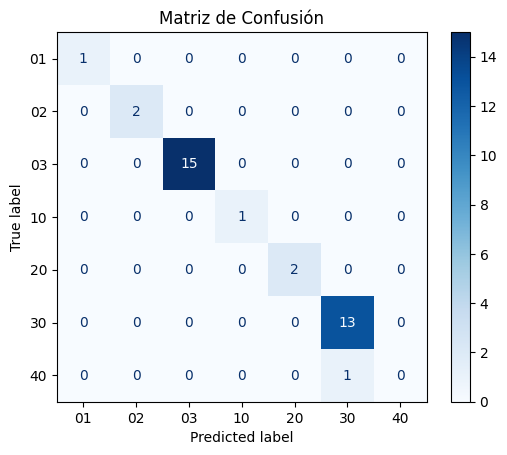

In [44]:
# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

In [45]:
# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, x, y_final, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

In [46]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

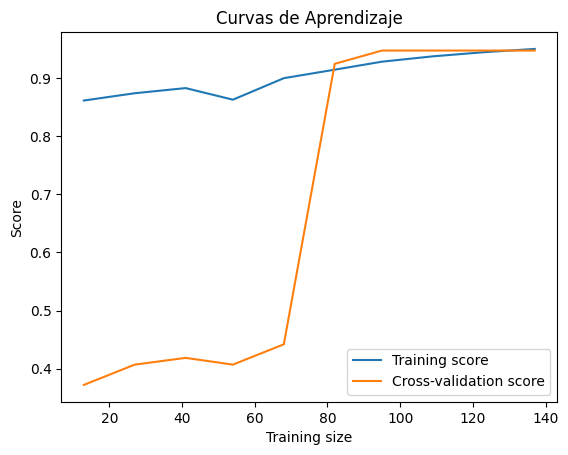

In [47]:
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend()
plt.title('Curvas de Aprendizaje')
plt.show()